# Problem Statement:

1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [1]:
# importing basic libraries

import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# Web Scrapping

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/Samsung-Galaxy-Ultra-Phantom-Storage/dp/B0BT9FDZ8N',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.6099.200 Safari/537.36'}

### Looping through Multiple Webpages

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(12)):
    soup = get_soup(f'https://www.amazon.in/Samsung-Galaxy-Ultra-Phantom-Storage/product-reviews/B0BT9FDZ8N/ref=cm_cr_getr_d_paging_btm_next_3?pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/12 [00:00<?, ?it/s]

In [6]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nThis is the best Android h...,5.0,I'll keep it short and direct.-Great in hand f...,Reviewed in India on 2 December 2023
1,5.0 out of 5 stars\nThe best smartphone money ...,5.0,After using Samsung Galaxy S23 Ultra for quite...,Reviewed in India on 7 May 2023
2,5.0 out of 5 stars\nWorth the money !!!,5.0,The phone is one of the best Android phone ava...,Reviewed in India on 23 November 2023
3,5.0 out of 5 stars\nHigh quality,5.0,It's simply perfect. This exactly meets my ex...,Reviewed in India on 30 December 2023
4,4.0 out of 5 stars\nAmazing phone but overshar...,4.0,"First of all, this was my last smartphone purc...",Reviewed in India on 7 November 2023
...,...,...,...,...
105,5.0 out of 5 stars\nAwesome Phone Worth Buying!!,5.0,Awesome camera quality and fastest processor e...,Reviewed in India on 17 April 2023
106,5.0 out of 5 stars\nGood product,5.0,received a brand new phone and functions are g...,Reviewed in India on 8 April 2023
107,5.0 out of 5 stars\nBest Mobile phone,5.0,Best mobile i have ever used,Reviewed in India on 15 April 2023
108,5.0 out of 5 stars\nExcellent phone,5.0,A sleek phone compared to the Fold series and ...,Reviewed in India on 9 April 2023


In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [8]:
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nThis is the best Android h...,5.0,I'll keep it short and direct.-Great in hand f...,2 December 2023
1,5.0 out of 5 stars\nThe best smartphone money ...,5.0,After using Samsung Galaxy S23 Ultra for quite...,7 May 2023
2,5.0 out of 5 stars\nWorth the money !!!,5.0,The phone is one of the best Android phone ava...,23 November 2023
3,5.0 out of 5 stars\nHigh quality,5.0,It's simply perfect. This exactly meets my ex...,30 December 2023
4,4.0 out of 5 stars\nAmazing phone but overshar...,4.0,"First of all, this was my last smartphone purc...",7 November 2023
...,...,...,...,...
105,5.0 out of 5 stars\nAwesome Phone Worth Buying!!,5.0,Awesome camera quality and fastest processor e...,17 April 2023
106,5.0 out of 5 stars\nGood product,5.0,received a brand new phone and functions are g...,8 April 2023
107,5.0 out of 5 stars\nBest Mobile phone,5.0,Best mobile i have ever used,15 April 2023
108,5.0 out of 5 stars\nExcellent phone,5.0,A sleek phone compared to the Fold series and ...,9 April 2023


In [9]:
#Export data into CSV file

df.to_csv("Samsung_Galaxy_S23_Ultra_5G_Review.csv")

In [10]:
# loading data
reviews = pd.read_csv('Samsung_Galaxy_S23_Ultra_5G_Review.csv')

# Data Exploration

In [11]:
reviews.shape

(110, 5)

In [12]:
reviews.head()

,Unnamed: 0,Title,Rating,Review,Review_Date
0,0,5.0 out of 5 stars\nThis is the best Android h...,5.0,I'll keep it short and direct.-Great in hand f...,2 December 2023
1,1,5.0 out of 5 stars\nThe best smartphone money ...,5.0,After using Samsung Galaxy S23 Ultra for quite...,7 May 2023
2,2,5.0 out of 5 stars\nWorth the money !!!,5.0,The phone is one of the best Android phone ava...,23 November 2023
3,3,5.0 out of 5 stars\nHigh quality,5.0,It's simply perfect. This exactly meets my ex...,30 December 2023
4,4,4.0 out of 5 stars\nAmazing phone but overshar...,4.0,"First of all, this was my last smartphone purc...",7 November 2023


In [13]:
reviews.tail()

,Unnamed: 0,Title,Rating,Review,Review_Date
105,105,5.0 out of 5 stars\nAwesome Phone Worth Buying!!,5.0,Awesome camera quality and fastest processor e...,17 April 2023
106,106,5.0 out of 5 stars\nGood product,5.0,received a brand new phone and functions are g...,8 April 2023
107,107,5.0 out of 5 stars\nBest Mobile phone,5.0,Best mobile i have ever used,15 April 2023
108,108,5.0 out of 5 stars\nExcellent phone,5.0,A sleek phone compared to the Fold series and ...,9 April 2023
109,109,5.0 out of 5 stars\nShifted from iOS to S23 Ultra,5.0,I have no regrets shifting from iOS to S23 ult...,6 March 2023


In [14]:
reviews.sample(5)

,Unnamed: 0,Title,Rating,Review,Review_Date
35,35,4.0 out of 5 stars\nWorth the hype,4.0,A smart phone thats worth the hype. Beats the ...,16 May 2023
1,1,5.0 out of 5 stars\nThe best smartphone money ...,5.0,After using Samsung Galaxy S23 Ultra for quite...,7 May 2023
8,8,4.0 out of 5 stars\nGood,4.0,High price,30 November 2023
101,101,5.0 out of 5 stars\nIn A League Of Its Own 😍,5.0,"Its a phone which is nearly peerless, don't th...",15 April 2023
109,109,5.0 out of 5 stars\nShifted from iOS to S23 Ultra,5.0,I have no regrets shifting from iOS to S23 ult...,6 March 2023


In [15]:
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nThis is the best Android h...,5.0,I'll keep it short and direct.-Great in hand f...,2 December 2023
1,5.0 out of 5 stars\nThe best smartphone money ...,5.0,After using Samsung Galaxy S23 Ultra for quite...,7 May 2023
2,5.0 out of 5 stars\nWorth the money !!!,5.0,The phone is one of the best Android phone ava...,23 November 2023
3,5.0 out of 5 stars\nHigh quality,5.0,It's simply perfect. This exactly meets my ex...,30 December 2023
4,4.0 out of 5 stars\nAmazing phone but overshar...,4.0,"First of all, this was my last smartphone purc...",7 November 2023


### Quick Data Check

In [16]:
reviews.Rating.describe()

count    110.000000
mean       4.736364
std        0.750257
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [17]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       109 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


# Data Preprocessing

### Identifying Missing Values

In [18]:
reviews.isna().sum()

Title          0
Rating         0
Review         1
Review_Date    0
dtype: int64

In [19]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nThis is the best Android h...,5.0,I'll keep it short and direct.-Great in hand f...,2 December 2023
1,5.0 out of 5 stars\nThe best smartphone money ...,5.0,After using Samsung Galaxy S23 Ultra for quite...,7 May 2023
2,5.0 out of 5 stars\nWorth the money !!!,5.0,The phone is one of the best Android phone ava...,23 November 2023
3,5.0 out of 5 stars\nHigh quality,5.0,It's simply perfect. This exactly meets my ex...,30 December 2023
4,4.0 out of 5 stars\nAmazing phone but overshar...,4.0,"First of all, this was my last smartphone purc...",7 November 2023


# Data Visualization

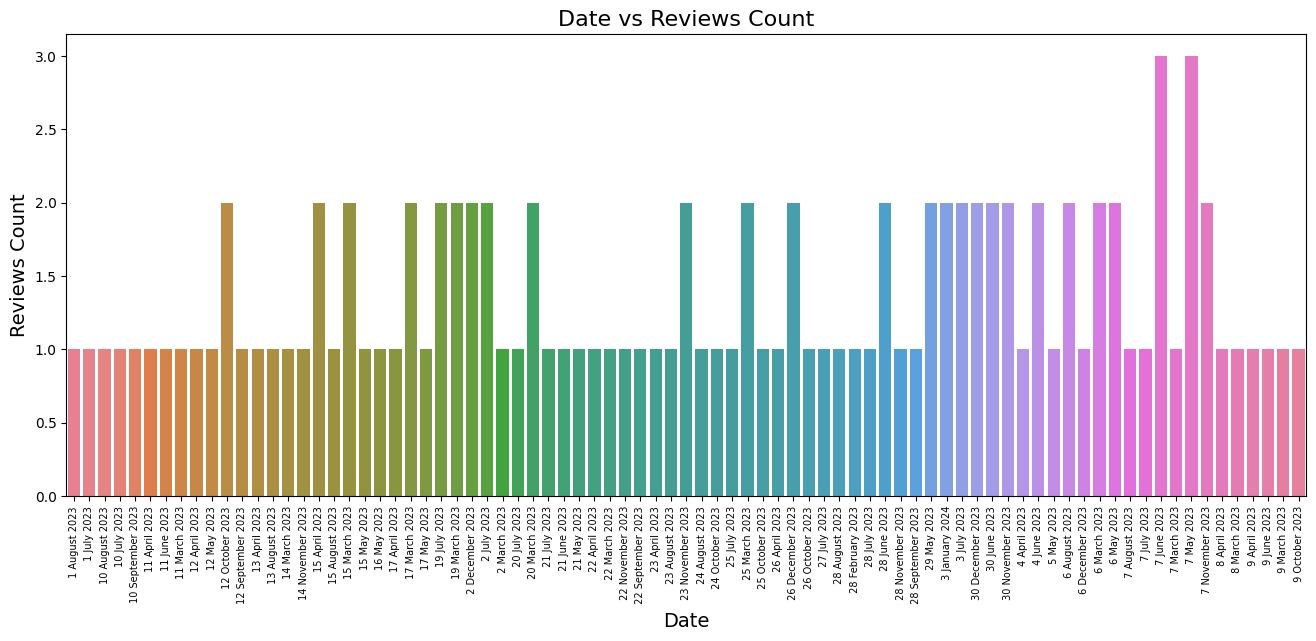

In [20]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview,hue='Date')
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

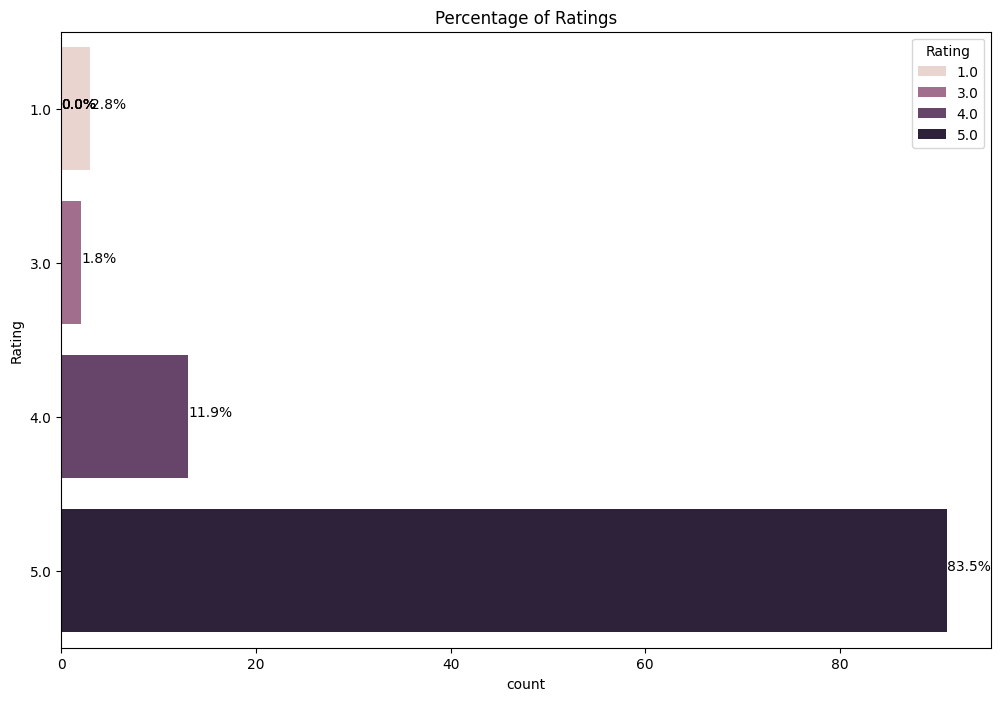

In [21]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data=reviews, hue='Rating')
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# Text Preprocessing

In [22]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I'll keep it short and direct.-Great in hand f...
1    After using Samsung Galaxy S23 Ultra for quite...
2    The phone is one of the best Android phone ava...
3    It's simply perfect.  His exactly meets my exp...
4    First of all, this was my last smartphone purc...
Name: Review, dtype: object

In [23]:
mobile_review = reviews[['Review']]
mobile_review

,Review
0,I'll keep it short and direct.-Great in hand f...
1,After using Samsung Galaxy S23 Ultra for quite...
2,The phone is one of the best Android phone ava...
3,It's simply perfect. This exactly meets my ex...
4,"First of all, this was my last smartphone purc..."
...,...
105,Awesome camera quality and fastest processor e...
106,received a brand new phone and functions are g...
107,Best mobile i have ever used
108,A sleek phone compared to the Fold series and ...


### Resetting index

In [24]:
mobile_review.reset_index(drop=True, inplace=True)

In [25]:
stop_words = stopwords.words('english')
mobile_review['Review'] = mobile_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

### Lemmatizer

In [26]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(mobile_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", mobile_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/109 [00:00<?, ?it/s]

In [27]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": mobile_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,keep short direct great hand feel aluminium fr...,i'll keep short direct.-great hand feel. the a...
1,using samsung galaxy ultra quite bit daily dri...,after using samsung galaxy s23 ultra quite bit...
2,phone one best android phone available market ...,the phone one best android phone available mar...
3,simply perfect exactly meet expectation high q...,it's simply perfect. this exactly meets expect...
4,first last smartphone purchase amazon complete...,"first all, last smartphone purchase amazon com..."


### Removing '@names'

In [28]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [29]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,keep short direct great hand feel aluminium fr...,i'll keep short direct.-great hand feel. the a...
1,using samsung galaxy ultra quite bit daily dri...,after using samsung galaxy s23 ultra quite bit...
2,phone one best android phone available market ...,the phone one best android phone available mar...
3,simply perfect exactly meet expectation high q...,it's simply perfect. this exactly meets expect...
4,first last smartphone purchase amazon complete...,"first all, last smartphone purchase amazon com..."
5,medium could loaded picture crisp look le dslr...,the media could loaded. the pictures crisp. th...
6,never apple fan android world best doubt compa...,"never apple fan. so android world best, doubts..."
7,ordered jul sat day got delivered hour time de...,i ordered 1-jul sat day got delivered hours ti...
8,high price,high price
9,smartphone beast aspect,this smartphone beast aspects.


### Removing links (http | https)

In [30]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,keep short direct great hand feel aluminium fr...,i'll keep short direct.-great hand feel. the a...
1,using samsung galaxy ultra quite bit daily dri...,after using samsung galaxy s23 ultra quite bit...
2,phone one best android phone available market ...,the phone one best android phone available mar...
3,simply perfect exactly meet expectation high q...,it's simply perfect. this exactly meets expect...
4,first last smartphone purchase amazon complete...,"first all, last smartphone purchase amazon com..."
5,medium could loaded picture crisp look le dslr...,the media could loaded. the pictures crisp. th...
6,never apple fan android world best doubt compa...,"never apple fan. so android world best, doubts..."
7,ordered jul sat day got delivered hour time de...,i ordered 1-jul sat day got delivered hours ti...
8,high price,high price
9,smartphone beast aspect,this smartphone beast aspects.


### Removing Review with empty text

In [31]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,keep short direct great hand feel aluminium fr...,i'll keep short direct.-great hand feel. the a...
1,using samsung galaxy ultra quite bit daily dri...,after using samsung galaxy s23 ultra quite bit...
2,phone one best android phone available market ...,the phone one best android phone available mar...
3,simply perfect exactly meet expectation high q...,it's simply perfect. this exactly meets expect...
4,first last smartphone purchase amazon complete...,"first all, last smartphone purchase amazon com..."
5,medium could loaded picture crisp look le dslr...,the media could loaded. the pictures crisp. th...
6,never apple fan android world best doubt compa...,"never apple fan. so android world best, doubts..."
7,ordered jul sat day got delivered hour time de...,i ordered 1-jul sat day got delivered hours ti...
8,high price,high price
9,smartphone beast aspect,this smartphone beast aspects.


### Dropping duplicate rows

In [32]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,keep short direct great hand feel aluminium fr...,i'll keep short direct.-great hand feel. the a...
1,using samsung galaxy ultra quite bit daily dri...,after using samsung galaxy s23 ultra quite bit...
2,phone one best android phone available market ...,the phone one best android phone available mar...
3,simply perfect exactly meet expectation high q...,it's simply perfect. this exactly meets expect...
4,first last smartphone purchase amazon complete...,"first all, last smartphone purchase amazon com..."
5,medium could loaded picture crisp look le dslr...,the media could loaded. the pictures crisp. th...
6,never apple fan android world best doubt compa...,"never apple fan. so android world best, doubts..."
7,ordered jul sat day got delivered hour time de...,i ordered 1-jul sat day got delivered hours ti...
8,high price,high price
9,smartphone beast aspect,this smartphone beast aspects.


### Function to remove emoji

In [33]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [34]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,keep short direct great hand feel aluminium fr...,i'll keep short direct.-great hand feel. the a...
1,using samsung galaxy ultra quite bit daily dri...,after using samsung galaxy s23 ultra quite bit...
2,phone one best android phone available market ...,the phone one best android phone available mar...
3,simply perfect exactly meet expectation high q...,it's simply perfect. this exactly meets expect...
4,first last smartphone purchase amazon complete...,"first all, last smartphone purchase amazon com..."
5,medium could loaded picture crisp look le dslr...,the media could loaded. the pictures crisp. th...
6,never apple fan android world best doubt compa...,"never apple fan. so android world best, doubts..."
7,ordered jul sat day got delivered hour time de...,i ordered 1-jul sat day got delivered hours ti...
8,high price,high price
9,smartphone beast aspect,this smartphone beast aspects.


### Removing Stop words

In [35]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [36]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [37]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,keep short direct great hand feel aluminium fr...,i'll keep short direct.-great hand feel. the a...
1,using samsung galaxy ultra quite bit daily dri...,after using samsung galaxy s23 ultra quite bit...
2,phone one best android phone available market ...,the phone one best android phone available mar...
3,simply perfect exactly meet expectation high q...,it's simply perfect. this exactly meets expect...
4,first last smartphone purchase amazon complete...,"first all, last smartphone purchase amazon com..."
5,medium could loaded picture crisp look le dslr...,the media could loaded. the pictures crisp. th...
6,never apple fan android world best doubt compa...,"never apple fan. so android world best, doubts..."
7,ordered jul sat day got delivered hour time de...,i ordered 1-jul sat day got delivered hours ti...
8,high price,high price
9,smartphone beast aspect,this smartphone beast aspects.


### Tokenize 'Clean_Reviews'

In [38]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['using', 'samsung', 'galaxy', 'ultra', 'quite', 'bit', 'daily', 'driver', 'coming', 'back', 'samsung', 'long', 'time', 'using', 'smaller', 'form', 'factor', 'phone', 'like', 'oneplus', 'think', 'phone', 'pro', 'phone', 'best', 'camera', 'ever', 'installed', 'smartphone', 'hand', 'phone', 'made', 'human', 'history', 'ever', 'come', 'close', 'samsung', 'galaxy', 'ultra', 'camera', 'performance', 'crazy', 'snapdragon', 'gen', 'custom', 'made', 'samsung', 'galaxy', 'phone', 'play', 'game', 'run', 'apps', 'whatever', 'want', 'phone', 'used', 'work', 'gaming', 'taking', 'photo', 'video', 'personal', 'use', 'time', 'rectangular', 'form', 'factor', 'phone', 'make', 'much', 'comfortable', 'easy', 'hold', 'look', 'premium', 'obviously', 'expected', 'phone', 'cost', 'much', 'oneui', 'many', 'great', 'feature', 'can', 'not', 'listed', 'one', 'place', 'brings', 'whole', 'new', 'meaning', 'smart', 'smartphones', 'previously', 'apple', 'making', 'real', 'smartphones', 'actually', 'smart', '

In [39]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [keep, short, direct, great, hand, feel, alumi...
1    [using, samsung, galaxy, ultra, quite, bit, da...
2    [phone, one, best, android, phone, available, ...
3    [simply, perfect, exactly, meet, expectation, ...
4    [first, last, smartphone, purchase, amazon, co...
5    [medium, could, loaded, picture, crisp, look, ...
6    [never, apple, fan, android, world, best, doub...
7    [ordered, jul, sat, day, got, delivered, hour,...
8                                        [high, price]
9                          [smartphone, beast, aspect]
Name: Clean_Reviews, dtype: object

In [40]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,keep short direct great hand feel aluminium fr...,i'll keep short direct.-great hand feel. the a...,"[keep, short, direct, great, hand, feel, alumi..."
1,using samsung galaxy ultra quite bit daily dri...,after using samsung galaxy s23 ultra quite bit...,"[using, samsung, galaxy, ultra, quite, bit, da..."
2,phone one best android phone available market ...,the phone one best android phone available mar...,"[phone, one, best, android, phone, available, ..."
3,simply perfect exactly meet expectation high q...,it's simply perfect. this exactly meets expect...,"[simply, perfect, exactly, meet, expectation, ..."
4,first last smartphone purchase amazon complete...,"first all, last smartphone purchase amazon com...","[first, last, smartphone, purchase, amazon, co..."
5,medium could loaded picture crisp look le dslr...,the media could loaded. the pictures crisp. th...,"[medium, could, loaded, picture, crisp, look, ..."
6,never apple fan android world best doubt compa...,"never apple fan. so android world best, doubts...","[never, apple, fan, android, world, best, doub..."
7,ordered jul sat day got delivered hour time de...,i ordered 1-jul sat day got delivered hours ti...,"[ordered, jul, sat, day, got, delivered, hour,..."
8,high price,high price,"[high, price]"
9,smartphone beast aspect,this smartphone beast aspects.,"[smartphone, beast, aspect]"


### Converting words to Stemmer

In [41]:
stemmer = SnowballStemmer("english")

In [42]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,keep short direct great hand feel aluminium fr...
1,use samsung galaxi ultra quit bit daili driver...
2,phone one best android phone avail market grea...
3,simpli perfect exact meet expect high qualiti ...
4,first last smartphon purchas amazon complet fr...
...,...
104,awesom camera qualiti fastest processor ever
105,receiv brand new phone function good struggl c...
106,best mobil ever use
107,sleek phone compar fold seri capabl


### Converting words to Lemma

In [43]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,keep short direct great hand feel aluminium fr...
1,using samsung galaxy ultra quite bit daily dri...
2,phone one best android phone available market ...
3,simply perfect exactly meet expectation high q...
4,first last smartphone purchase amazon complete...
...,...
104,awesome camera quality fastest processor ever
105,received brand new phone function good struggl...
106,best mobile ever used
107,sleek phone compared fold series capable


# Basic Feature Extaction

### Applying bag of Words without N grams

In [44]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [45]:
print(cv.get_feature_names_out()[109:200])

['budget' 'bug' 'build' 'built' 'bump' 'butter' 'button' 'buy' 'buyer'
 'buying' 'cable' 'cafe' 'call' 'called' 'cam' 'came' 'camera'
 'camerabest' 'cancelled' 'cannot' 'capability' 'capable' 'capture'
 'captured' 'car' 'card' 'care' 'case' 'charge' 'charged' 'charger'
 'charging' 'cheapest' 'check' 'checked' 'childhood' 'choice' 'choose'
 'choosing' 'class' 'clean' 'clear' 'click' 'clicked' 'clone' 'close'
 'coated' 'coffee' 'collect' 'color' 'coloros' 'colour' 'come'
 'comfortable' 'coming' 'compare' 'compared' 'comparing' 'compensate'
 'competition' 'complain' 'complaint' 'complete' 'compliment' 'compromise'
 'computer' 'con' 'confident' 'confidently' 'configure' 'connectivity'
 'constant' 'continues' 'convenient' 'cool' 'cooling' 'copy' 'corner'
 'cost' 'costly' 'could' 'coupled' 'coupon' 'cover' 'coz' 'cpu' 'crazy'
 'crisp' 'cross' 'current' 'curve']


In [46]:
print(cv.get_feature_names_out()[:100])

['abbas' 'ability' 'able' 'absolute' 'access' 'achive' 'actually' 'ad'
 'adapter' 'add' 'addictive' 'addition' 'advantage' 'advertising' 'afford'
 'affordable' 'aggressive' 'agonizing' 'ai' 'alive' 'allrounder' 'almost'
 'already' 'also' 'aluminium' 'always' 'amazed' 'amazing' 'amazon'
 'amongst' 'amz' 'andoid' 'android' 'another' 'anymore' 'anyone'
 'anything' 'anytime' 'apart' 'app' 'appear' 'apple' 'apps' 'around'
 'artificial' 'artificially' 'ask' 'asked' 'aspect' 'assigned' 'assure'
 'astro' 'atleast' 'attempt' 'authenticity' 'auto' 'available' 'avid'
 'avoid' 'awesome' 'awsome' 'back' 'background' 'backup' 'bad' 'bane'
 'bar' 'barely' 'barrier' 'basic' 'battery' 'batterybest' 'battry' 'beast'
 'beasty' 'beat' 'beautiful' 'become' 'becomes' 'behind' 'believe'
 'benchmark' 'best' 'better' 'beyond' 'bezel' 'big' 'biggest' 'bird' 'bit'
 'bloatware' 'blowing' 'blur' 'book' 'booking' 'bought' 'box' 'brand'
 'bright' 'brightness']


In [47]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### CountVectorizer with N-grams (Bigrams & Trigrams)

In [48]:
dataframe = dataframe.reset_index(drop=True)

In [49]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/108 [00:00<?, ?it/s]

In [50]:
corpus[3]

'simpli perfect exactli meet expect high qualiti phone noth noth le mini comput'

### Applying Countvectorizer (Creating the Bag of Words model)

In [51]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [52]:
X.shape

(108, 1546)

In [53]:
cv.get_feature_names_out()[:20]

array(['actual', 'add', 'afford', 'almost', 'also', 'alway', 'amaz',
       'amazon', 'android', 'android phone', 'android phone avail',
       'anoth', 'anymor', 'app', 'app lock', 'appl', 'appl fan', 'ask',
       'aspect', 'avail'], dtype=object)

In [54]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [55]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,actual,add,afford,almost,also,alway,amaz,amazon,android,android phone,...,year ye,year ye take,yesterday,yesterday visit,yesterday visit nearbi,yr,yr given,yr given constant,zoom,zoom qualiti
0,0,0,0,0,0,0,1,0,2,0,...,1,1,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,2,1,...,0,0,0,0,0,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Vectorizer

In [56]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/108 [00:00<?, ?it/s]

In [57]:
corpus[4]

'first last smartphon purchas amazon complet fraud deni replac return pick fraudul cancel multipl time period month avoid buy smartphon onlin portal authent custom support alway doubt come phone good phone excel batteri life littl overh issu plagu ultra howev bane buy phone samsung process sharpen imag default camera continu issu sever year updat one reason bring recommend phone someon look take realist natur detail photo'

### Applying TF-IDF Vectorizer

In [58]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [59]:
X.shape

(108, 1546)

In [60]:
tfidf_v.get_feature_names_out()[:20]

array(['actual', 'add', 'afford', 'almost', 'also', 'alway', 'amaz',
       'amazon', 'android', 'android phone', 'android phone avail',
       'anoth', 'anymor', 'app', 'app lock', 'appl', 'appl fan', 'ask',
       'aspect', 'avail'], dtype=object)

In [61]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [62]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,actual,add,afford,almost,also,alway,amaz,amazon,android,android phone,...,year ye,year ye take,yesterday,yesterday visit,yesterday visit nearbi,yr,yr given,yr given constant,zoom,zoom qualiti
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.054903,0.000000,0.086890,0.000000,...,0.069812,0.069812,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.027058,0.054117,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.154593,0.101293,...,0.000000,0.000000,0.0,0.0,0.0,0.124208,0.124208,0.124208,0.105462,0.124208
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.067962,0.000000,0.070252,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
104,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
105,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
106,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


### Named Entity Recognition (NER)

In [63]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'keep short direct great hand feel aluminium frame glass back feel nice hold probably best screen qhd really bright high refresh rate amazing battery life charge phone screen time hour get home left great camera even gonna get deep spen wonderful use really helped improve productivity one ui probably favourite android skin android even better samsung provide update phone year coupled fact samsung offer cheapest repair option india mean really need worry getting new one next year yes take call network issue thing phone make coffee budget would get better phone next one come using samsung galaxy ultra quite bit daily driver coming back samsung long time using smaller form factor phone like oneplus think phone pro phone best camera ever installed smartphone hand phone made human history ever come close samsung galaxy ultra camera performance crazy snapdragon gen custom made samsung galaxy phone play game run apps whatever want phone used work gaming taking photo video personal use time re

### Parts Of Speech (POS) Tagging

In [64]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [65]:
for token in doc_block[:50]:
    print(token,token.pos_)

keep VERB
short ADJ
direct ADJ
great ADJ
hand NOUN
feel VERB
aluminium NOUN
frame NOUN
glass NOUN
back ADV
feel VERB
nice ADJ
hold NOUN
probably ADV
best ADJ
screen NOUN
qhd NOUN
really ADV
bright ADJ
high ADJ
refresh ADJ
rate NOUN
amazing ADJ
battery NOUN
life NOUN
charge VERB
phone NOUN
screen NOUN
time NOUN
hour NOUN
get VERB
home NOUN
left VERB
great ADJ
camera NOUN
even ADV
gon VERB
na PART
get VERB
deep ADJ
spen ADJ
wonderful ADJ
use NOUN
really ADV
helped VERB
improve VERB
productivity NOUN
one NUM
ui ADV
probably ADV


### Filtering the nouns and verbs only

In [66]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['make', 'hold', 'look', 'premium', 'expected', 'phone', 'cost', 'feature', 'listed', 'place', 'brings', 'meaning', 'smartphones', 'apple', 'making', 'smartphones', 'joined', 'done', 'job', 'apple', 'point', 'lock', 'module', 'oneui', 'level', 'customization', 'term', 'aspect', 'usability', 'come', 'con', 'section', 'charging', 'time', 'reverse', 'charging', 'wireless', 'charging', 'add', 'help', 'make', 'experience', 'pen', 'wonder', 'use', 'phone', 'work', 'esigning', 'precision', 'work', 'build', 'quality', 'software', 'premium', 'know', 'sold', 'kidney', 'hold', 'phone', 'hand', 'turn', 'max', 'resolution', 'display', 'side', 'compared', 'make', 'phone', 'con', 'phone', 'curved', 'display', 'add', 'usability', 'make', 'use', 'people', 'hand', 'reach', 'corner', 'hand', 'becomes', 'used', 'kind', 'display', 'used', 'display', 'phone', 'form', 'factor', 'issue', 'curved', 'screen', 'curve', 'screen', 'finding', 'screen', 'protector', 'tempered', 'glass']


### Counting the noun & verb tokens

In [67]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,phone,159
1,camera,53
2,battery,33
3,display,24
4,screen,23
5,time,22
6,use,21
7,make,20
8,life,19
9,quality,19


### Visualizing results (Barchart for top 10 nouns + verbs)

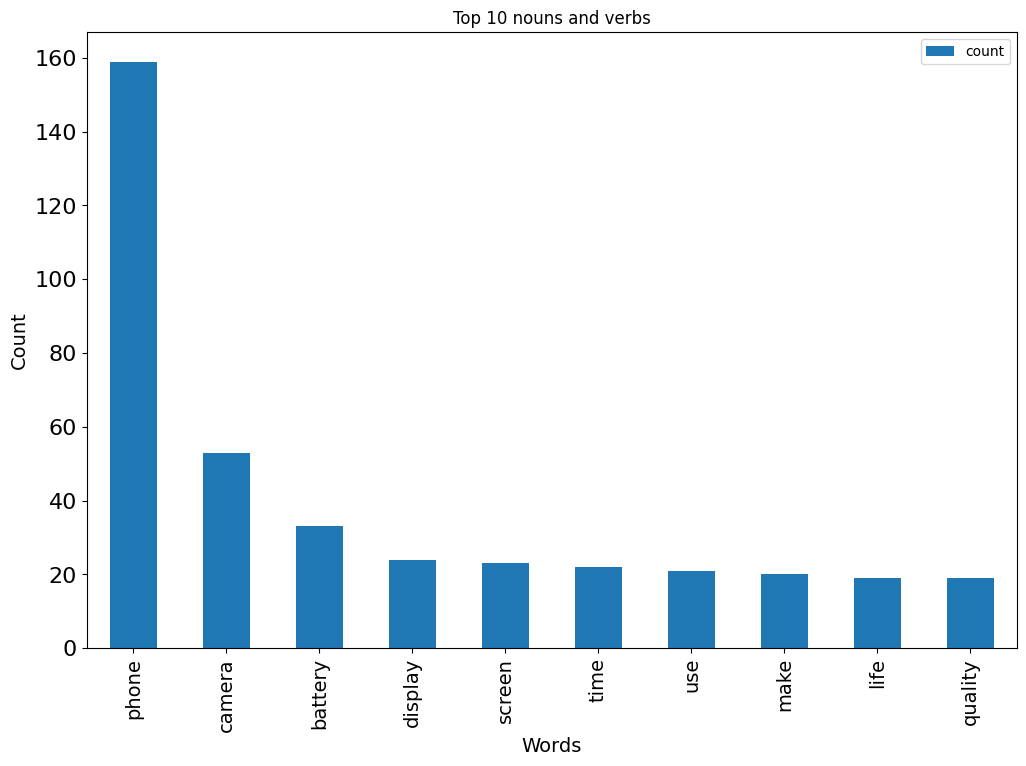

In [68]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Feature Extraction

### BOW Features

In [69]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

### TF-IDF Features

In [70]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# Fetch sentiments

In [71]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

### Using NLTK's SentimentIntensityAnalyzer

In [72]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,count
Clean_Reviews,
pos,99
neg,9


In [73]:
dataframe.Clean_Reviews[8]

'high price'

In [74]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [75]:
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [76]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,keep short direct great hand feel aluminium fr...,"{'neg': 0.025, 'neu': 0.648, 'pos': 0.326, 'co..."
1,using samsung galaxy ultra quite bit daily dri...,"{'neg': 0.049, 'neu': 0.682, 'pos': 0.269, 'co..."
2,phone one best android phone available market ...,"{'neg': 0.031, 'neu': 0.66, 'pos': 0.309, 'com..."
3,simply perfect exactly meet expectation high q...,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'comp..."
4,first last smartphone purchase amazon complete...,"{'neg': 0.161, 'neu': 0.676, 'pos': 0.163, 'co..."


In [77]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,keep short direct great hand feel aluminium fr...,"{'neg': 0.025, 'neu': 0.648, 'pos': 0.326, 'co...",0.9896
1,using samsung galaxy ultra quite bit daily dri...,"{'neg': 0.049, 'neu': 0.682, 'pos': 0.269, 'co...",0.9983
2,phone one best android phone available market ...,"{'neg': 0.031, 'neu': 0.66, 'pos': 0.309, 'com...",0.9153
3,simply perfect exactly meet expectation high q...,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'comp...",0.5719
4,first last smartphone purchase amazon complete...,"{'neg': 0.161, 'neu': 0.676, 'pos': 0.163, 'co...",0.0516


In [78]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,keep short direct great hand feel aluminium fr...,"{'neg': 0.025, 'neu': 0.648, 'pos': 0.326, 'co...",0.9896,Positive
1,using samsung galaxy ultra quite bit daily dri...,"{'neg': 0.049, 'neu': 0.682, 'pos': 0.269, 'co...",0.9983,Positive
2,phone one best android phone available market ...,"{'neg': 0.031, 'neu': 0.66, 'pos': 0.309, 'com...",0.9153,Positive
3,simply perfect exactly meet expectation high q...,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'comp...",0.5719,Positive
4,first last smartphone purchase amazon complete...,"{'neg': 0.161, 'neu': 0.676, 'pos': 0.163, 'co...",0.0516,Positive
...,...,...,...,...
103,awesome camera quality fastest processor ever,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.6249,Positive
104,received brand new phone function good struggl...,"{'neg': 0.239, 'neu': 0.513, 'pos': 0.248, 'co...",0.0258,Neutral
105,best mobile ever used,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.6369,Positive
106,sleek phone compared fold series capable,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp...",0.3818,Positive


In [79]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Review
2,Positive,87
1,Neutral,13
0,Negative,8


<Axes: xlabel='sentiment', ylabel='count'>

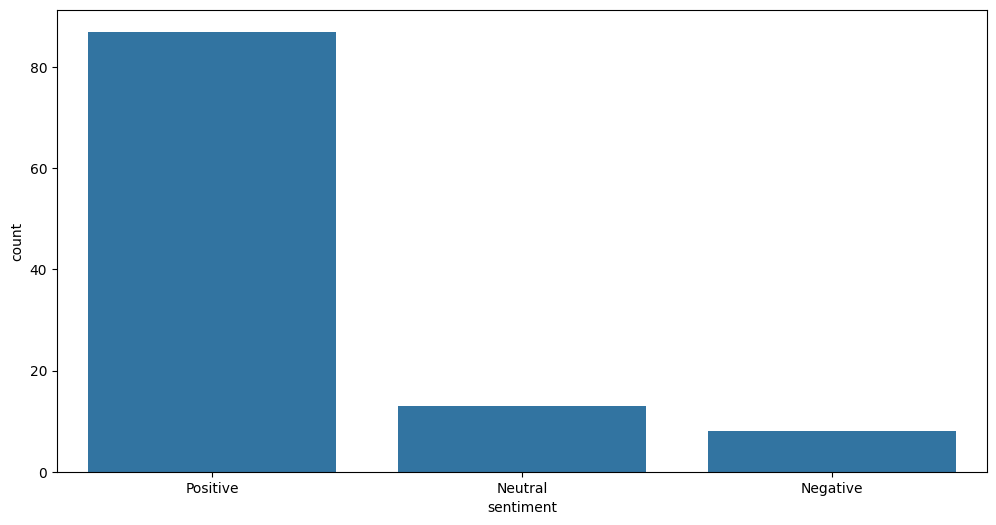

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

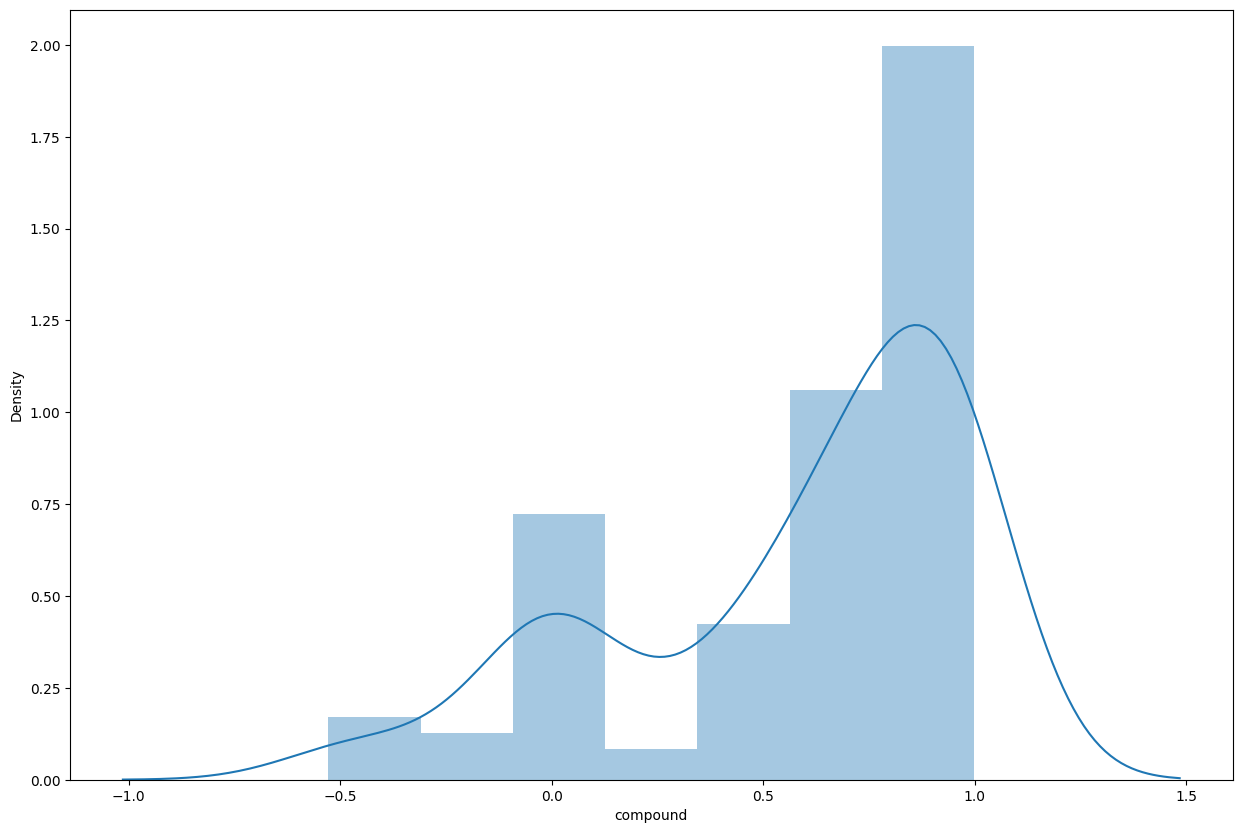

In [81]:
# sentiment value for whole review
plt.figure(figsize=(15,10))
sns.distplot(df['compound']);

In [82]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

,Review,word_count
0,keep short direct great hand feel aluminium fr...,94
1,using samsung galaxy ultra quite bit daily dri...,370
2,phone one best android phone available market ...,33
3,simply perfect exactly meet expectation high q...,13
4,first last smartphone purchase amazon complete...,66


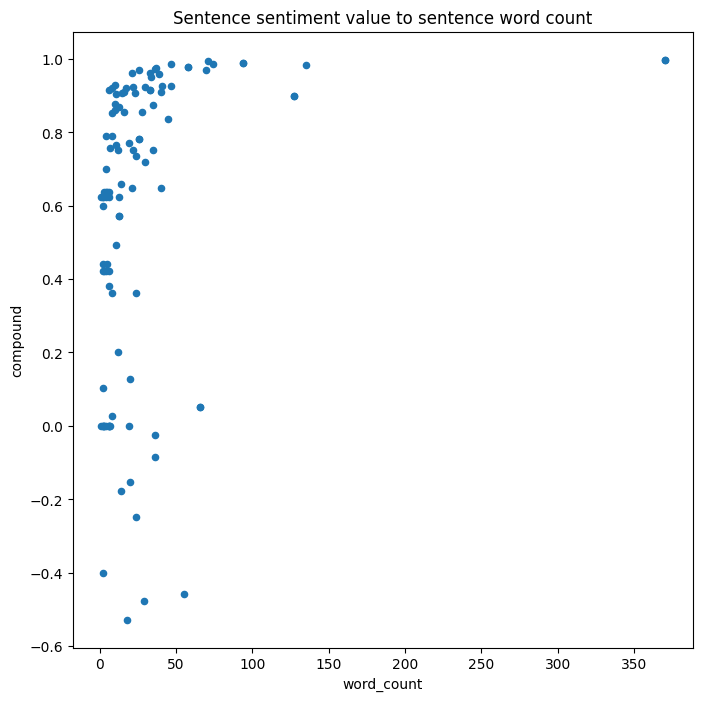

In [83]:
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count');

### Using TextBlob

In [84]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,106
neg,2


### calculating subjectivity and Polarity

In [85]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,keep short direct great hand feel aluminium fr...,i'll keep short direct.-great hand feel. the a...,"[keep, short, direct, great, hand, feel, alumi...",0.461050,0.332565
1,using samsung galaxy ultra quite bit daily dri...,after using samsung galaxy s23 ultra quite bit...,"[using, samsung, galaxy, ultra, quite, bit, da...",0.484070,0.200647
2,phone one best android phone available market ...,the phone one best android phone available mar...,"[phone, one, best, android, phone, available, ...",0.327778,0.244444
3,simply perfect exactly meet expectation high q...,it's simply perfect. this exactly meets expect...,"[simply, perfect, exactly, meet, expectation, ...",0.596667,0.470000
4,first last smartphone purchase amazon complete...,"first all, last smartphone purchase amazon com...","[first, last, smartphone, purchase, amazon, co...",0.443939,0.148106


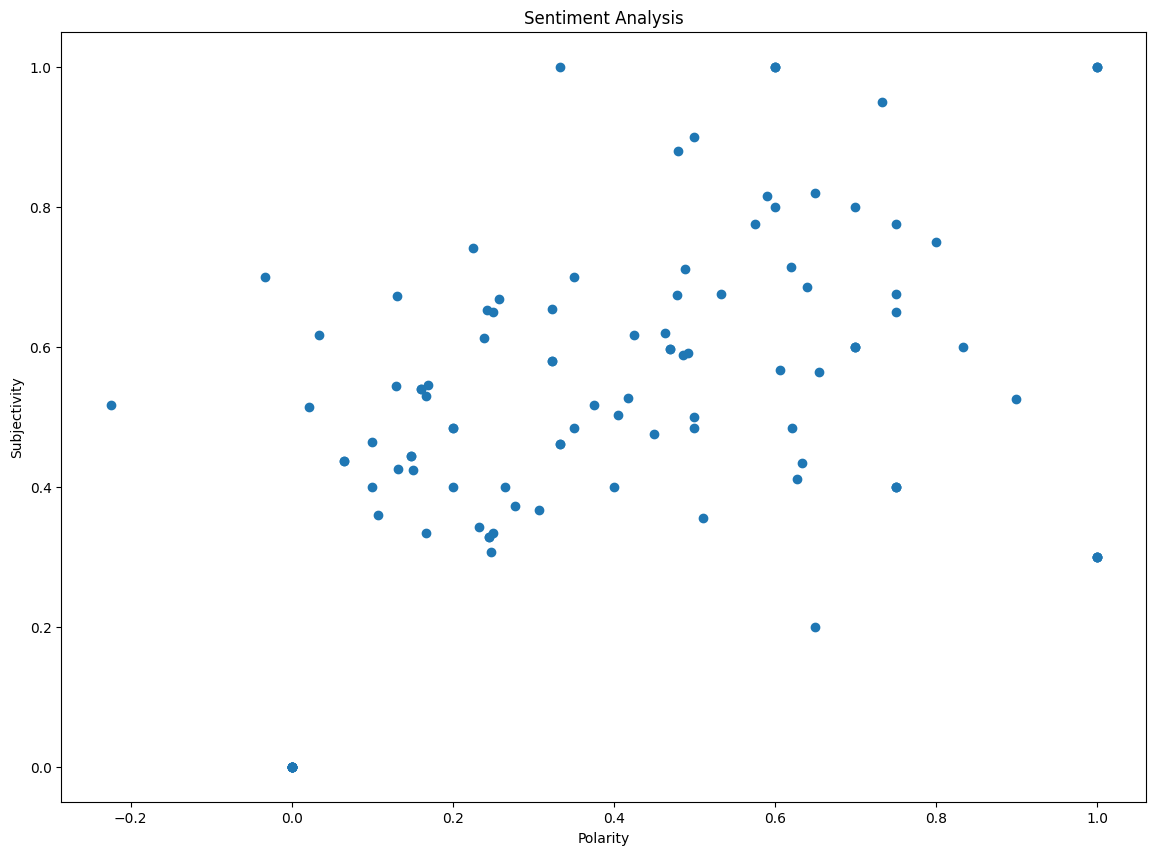

In [86]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [87]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,keep short direct great hand feel aluminium fr...,i'll keep short direct.-great hand feel. the a...,"[keep, short, direct, great, hand, feel, alumi...",0.461050,0.332565,pos
1,using samsung galaxy ultra quite bit daily dri...,after using samsung galaxy s23 ultra quite bit...,"[using, samsung, galaxy, ultra, quite, bit, da...",0.484070,0.200647,pos
2,phone one best android phone available market ...,the phone one best android phone available mar...,"[phone, one, best, android, phone, available, ...",0.327778,0.244444,pos
3,simply perfect exactly meet expectation high q...,it's simply perfect. this exactly meets expect...,"[simply, perfect, exactly, meet, expectation, ...",0.596667,0.470000,pos
4,first last smartphone purchase amazon complete...,"first all, last smartphone purchase amazon com...","[first, last, smartphone, purchase, amazon, co...",0.443939,0.148106,pos


# Visualization

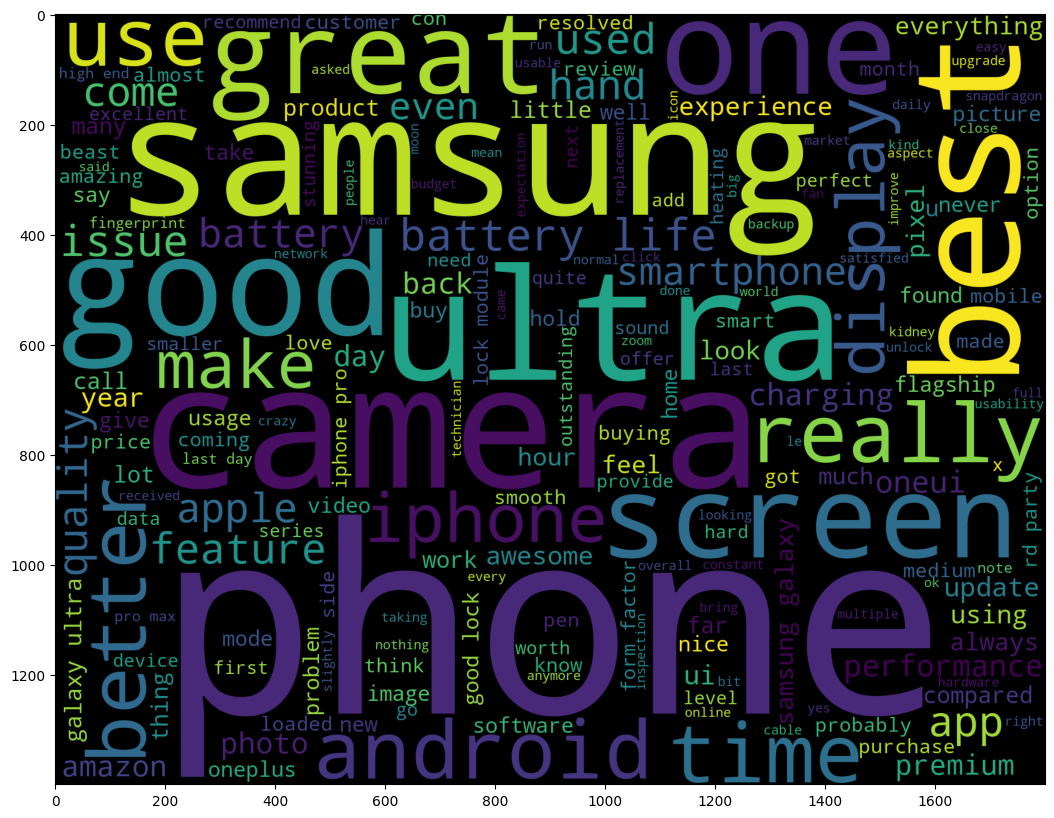

In [88]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

### Most common words in positive Review

In [89]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

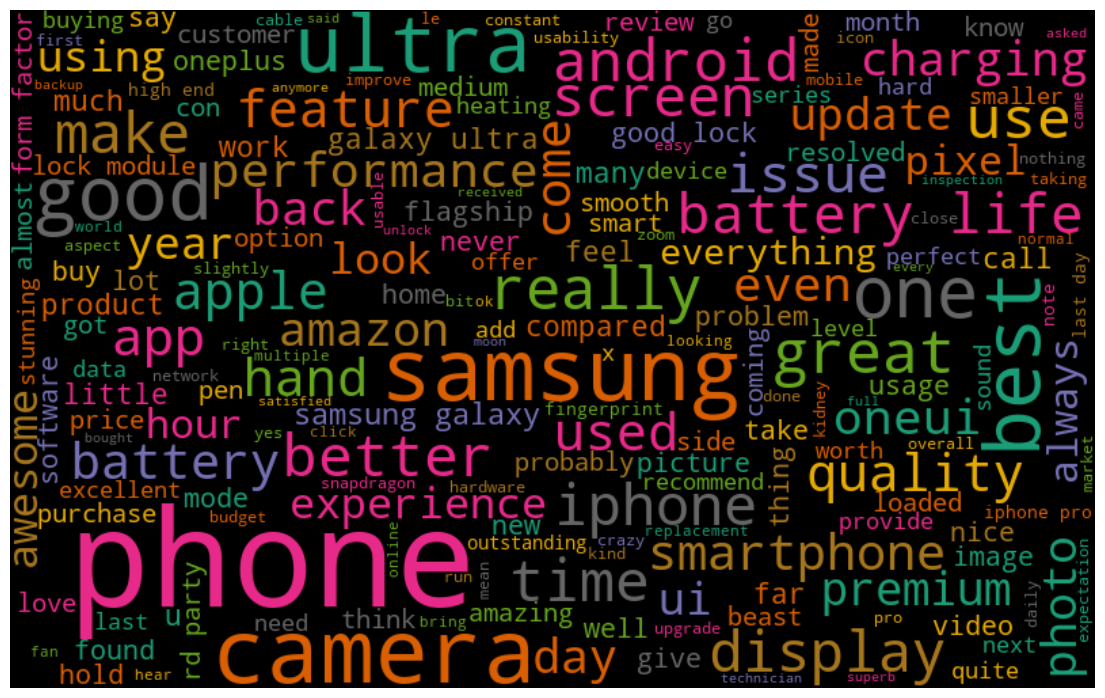

In [90]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### Most common words in negative Review

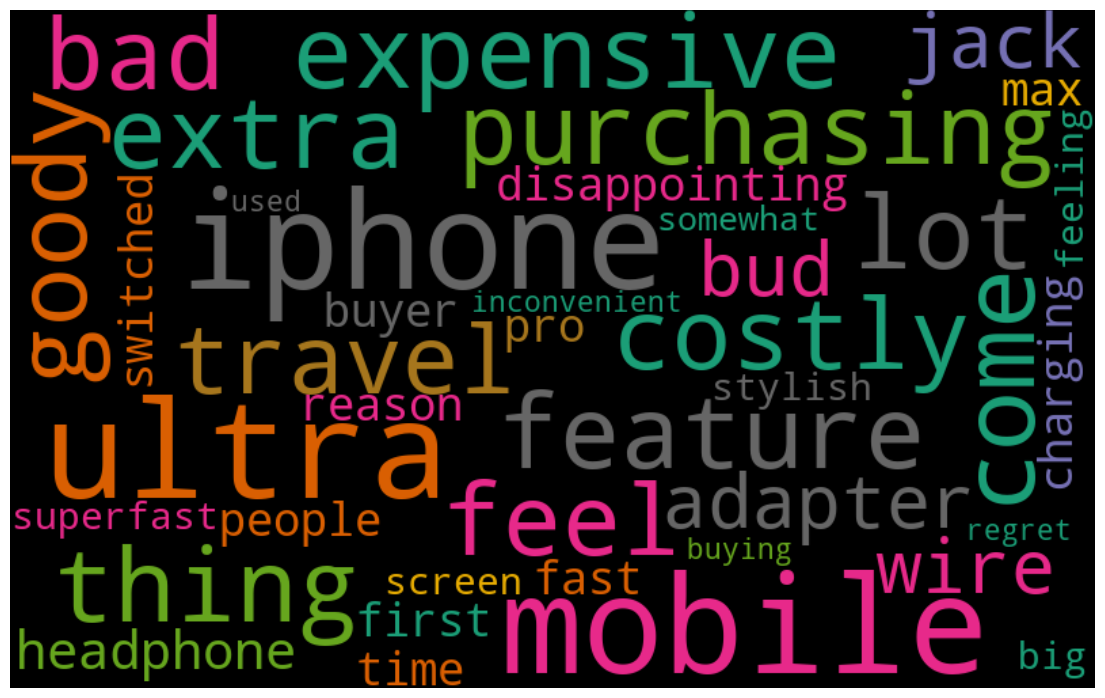

In [91]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)